In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import model_selection, preprocessing
import xgboost as xgb
import datetime
#now = datetime.datetime.now()
#这个测试一下 k = 15
#发现没用，结果变的小了，分数31947
#说明这个特征没有显著的提高
#pearson测试中显示lat特征有0.15的相关性

#尝试只加入lon 删掉相关性小的特征 训练次数为550
#6/25
#变好了！31671
#尝试只加入lat 训练600次
#比不加好 31707
#尝试将两个都加入 训练480次吧 31761

train = pd.read_csv('/Users/xiechenwei/Desktop/数据挖掘结果/train_wity_kmeans.csv', parse_dates=['timestamp'])
test = pd.read_csv('/Users/xiechenwei/Desktop/数据挖掘结果/test_wity_kmeans.csv', parse_dates=['timestamp'])
train=train.drop([ 'lat','km_lat_lon_price'], axis = 1)
test=test.drop(['lat','km_lat_lon_price'], axis = 1)
#train=train.drop([ 'lat'], axis = 1)
#test=test.drop(['lat'], axis = 1)
#---------------
#last 31915 全部特征
#train = pd.read_csv('/Users/xiechenwei/Downloads/train.csv', parse_dates=['timestamp'])
#test = pd.read_csv('/Users/xiechenwei/Downloads/test.csv', parse_dates=['timestamp'])
macro = pd.read_csv('/Users/xiechenwei/Downloads/macro.csv', parse_dates=['timestamp'])
df_fixup = pd.read_excel('/Users/xiechenwei/Downloads/BAD_ADDRESS_FIX.xlsx')
id_test = test.id
train.head(1)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,4,0,13,22,1,0,52,4,5850000,37.609459


In [150]:
#6/25测试删掉相关性小的特征
#nice!31732 去掉了这些特征有了明显的提高
train=train.drop([
    'build_year',
    'kitch_sq',
    'green_zone_part',
    'indust_part',
    'preschool_quota',
    'school_quota',
    'additional_education_raion',
    'full_all',
    'male_f',
    'female_f',
    '16_29_all',
    '16_29_male',
    '16_29_female',
    'raion_build_count_with_material_info',
    'build_count_block',
    'build_count_frame',
    'build_count_panel',
    'build_count_foam',
    'build_count_slag',
    'build_count_mix',
    'raion_build_count_with_builddate_info',
    'build_count_1946-1970', 
    'build_count_1971-1995',
     'build_count_after_1995', 
     'ID_metro',
    'green_zone_km', 'industrial_km', 'water_treatment_km',
       'cemetery_km', 'incineration_km',
       'ID_railroad_station_walk',
       'ID_railroad_station_avto',
       'water_km',
       'mkad_km',
       'ID_big_road1',
       'ID_bus_terminal',
       'big_market_km',
       'green_part_500',
       'prom_part_500',
       'trc_count_500', 
       'trc_sqm_500',
       'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500',
       'cafe_count_500_na_price',
       'cafe_count_500_price_high',
       'church_count_500',
        'mosque_count_500',
       'market_count_500', 
       'green_part_1000',
       'prom_part_1000',
       'trc_sqm_1000',
       'cafe_count_1000_price_4000',
       'church_count_1000',
       'market_count_1000',
       'green_part_1500',
       'cafe_count_1500_price_4000',
       'big_church_count_1500',
       'prom_part_2000',
       'prom_part_3000',
       'cafe_sum_3000_min_price_avg',
       'cafe_sum_3000_max_price_avg', 
       'cafe_avg_price_3000',
       'prom_part_5000',
       'cafe_sum_5000_min_price_avg', 
       'cafe_sum_5000_max_price_avg',
       'cafe_avg_price_5000'], axis = 1)
test=test.drop(['build_year',
    'kitch_sq',
    'green_zone_part',
    'indust_part',
    'preschool_quota',
    'school_quota',
    'additional_education_raion',
    'full_all',
    'male_f',
    'female_f',
    '16_29_all',
    '16_29_male',
    '16_29_female',
    'raion_build_count_with_material_info',
    'build_count_block',
    'build_count_frame',
    'build_count_panel',
    'build_count_foam',
    'build_count_slag',
    'build_count_mix',
    'raion_build_count_with_builddate_info',
    'build_count_1946-1970', 
    'build_count_1971-1995',
     'build_count_after_1995', 
     'ID_metro',
    'green_zone_km', 'industrial_km', 'water_treatment_km',
       'cemetery_km', 'incineration_km',
       'ID_railroad_station_walk',
       'ID_railroad_station_avto',
       'water_km',
       'mkad_km',
       'ID_big_road1',
       'ID_bus_terminal',
       'big_market_km',
       'green_part_500',
       'prom_part_500',
       'trc_count_500', 
       'trc_sqm_500',
       'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500',
       'cafe_count_500_na_price',
       'cafe_count_500_price_high',
       'church_count_500',
        'mosque_count_500',
       'market_count_500', 
       'green_part_1000',
       'prom_part_1000',
       'trc_sqm_1000',
       'cafe_count_1000_price_4000',
       'church_count_1000',
       'market_count_1000',
       'green_part_1500',
       'cafe_count_1500_price_4000',
       'big_church_count_1500',
       'prom_part_2000',
       'prom_part_3000',
       'cafe_sum_3000_min_price_avg',
       'cafe_sum_3000_max_price_avg', 
       'cafe_avg_price_3000',
       'prom_part_5000',
       'cafe_sum_5000_min_price_avg', 
       'cafe_sum_5000_max_price_avg',
       'cafe_avg_price_5000'], axis = 1)



In [151]:
train.head(1)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,state,product_type,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,Investment,...,4,0,13,22,1,0,52,4,5850000,37.609459


In [82]:

#df_all = pd.concat([train.drop(['price_doc'], axis=1), test])

#fix the data
#-----------------------------------
for i in (list(df_fixup['id'])):
    (train.loc[train['id'] == i, df_fixup.columns]) = df_fixup.loc[df_fixup['id']== i].values


KeyError: "Index(['green_zone_part', 'indust_part', 'preschool_quota', 'school_quota',\n       'additional_education_raion', 'full_all', 'male_f', 'female_f',\n       '16_29_all', '16_29_male', '16_29_female',\n       'raion_build_count_with_material_info', 'build_count_block',\n       'build_count_frame', 'build_count_panel', 'build_count_foam',\n       'build_count_slag', 'build_count_mix',\n       'raion_build_count_with_builddate_info', 'build_count_1946-1970',\n       'build_count_1971-1995', 'build_count_after_1995', 'ID_metro',\n       'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km',\n       'incineration_km', 'ID_railroad_station_walk',\n       'ID_railroad_station_avto', 'water_km', 'mkad_km', 'ID_big_road1',\n       'ID_bus_terminal', 'big_market_km', 'green_part_500', 'prom_part_500',\n       'trc_count_500', 'trc_sqm_500', 'cafe_sum_500_max_price_avg',\n       'cafe_avg_price_500', 'cafe_count_500_na_price',\n       'cafe_count_500_price_high', 'church_count_500', 'mosque_count_500',\n       'market_count_500', 'green_part_1000', 'prom_part_1000', 'trc_sqm_1000',\n       'cafe_count_1000_price_4000', 'church_count_1000', 'market_count_1000',\n       'green_part_1500', 'cafe_count_1500_price_4000',\n       'big_church_count_1500', 'prom_part_2000', 'prom_part_3000',\n       'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg',\n       'cafe_avg_price_3000', 'prom_part_5000', 'cafe_sum_5000_min_price_avg',\n       'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000'],\n      dtype='object') not in index"

In [140]:
#merge the macro data
#ignore the macro
#--------------------------------------------------------
#train = pd.merge(train, macro, on = 'timestamp', how = 'left')

train.head(1)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,state,product_type,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,km_lat_lon_price
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,Investment,...,0,13,22,1,0,52,4,5850000,37.609459,9


In [124]:
#clean data
#不是很确定是否对结果有好的效果，之前加入结果变差
bad_index = train[train.life_sq > train.full_sq].index
train.ix[bad_index, "life_sq"] = np.NaN
equal_index = [601,1896,2791]
test.ix[equal_index, "life_sq"] = test.ix[equal_index, "full_sq"]
bad_index = test[test.life_sq > test.full_sq].index
test.ix[bad_index, "life_sq"] = np.NaN
bad_index = train[train.life_sq < 5].index
train.ix[bad_index, "life_sq"] = np.NaN
bad_index = test[test.life_sq < 5].index
test.ix[bad_index, "life_sq"] = np.NaN
bad_index = train[train.full_sq < 5].index
train.ix[bad_index, "full_sq"] = np.NaN
bad_index = test[test.full_sq < 5].index
test.ix[bad_index, "full_sq"] = np.NaN
kitch_is_build_year = [13117]

train.ix[bad_index, "full_sq"] = np.NaN
bad_index = test[(test.full_sq > 150) & (test.life_sq / test.full_sq < 0.3)].index
test.ix[bad_index, "full_sq"] = np.NaN
bad_index = train[train.life_sq > 300].index
train.ix[bad_index, ["life_sq", "full_sq"]] = np.NaN
bad_index = test[test.life_sq > 200].index
test.ix[bad_index, ["life_sq", "full_sq"]] = np.NaN
train.product_type.value_counts(normalize= True)
test.product_type.value_counts(normalize= True)
bad_index = train[train.build_year < 1500].index
good_index = train[train.build_year >= 1500].index

# year #
train['year'] = train['timestamp'].dt.year
test['year'] = test['timestamp'].dt.year

train.ix[bad_index, "build_year"] = np.NaN
train['age_build'] = np.NaN
test['age_build'] = np.NaN
train.ix[good_index, "age_build"] = train['year'] - train['build_year']
good_index = test[train.build_year >= 1500].index
test.ix[good_index, "age_build"] = test['year'] - test['build_year']
bad_index = test[test.build_year < 1500].index
test.ix[bad_index, "build_year"] = np.NaN
bad_index = train[train.num_room == 0].index 
train.ix[bad_index, "num_room"] = np.NaN
bad_index = test[test.num_room == 0].index 
test.ix[bad_index, "num_room"] = np.NaN
bad_index = [10076, 11621, 17764, 19390, 24007, 26713, 29172]
train.ix[bad_index, "num_room"] = np.NaN
bad_index = [3174, 7313]
test.ix[bad_index, "num_room"] = np.NaN
bad_index = train[(train.floor == 0).values * (train.max_floor == 0).values].index
train.ix[bad_index, ["max_floor", "floor"]] = np.NaN
bad_index = train[train.floor == 0].index
train.ix[bad_index, "floor"] = np.NaN
bad_index = train[train.max_floor == 0].index
train.ix[bad_index, "max_floor"] = np.NaN
bad_index = test[test.max_floor == 0].index
test.ix[bad_index, "max_floor"] = np.NaN
bad_index = train[train.floor > train.max_floor].index
train.ix[bad_index, "max_floor"] = np.NaN
bad_index = test[test.floor > test.max_floor].index
test.ix[bad_index, "max_floor"] = np.NaN
train.floor.describe(percentiles= [0.9999])
bad_index = [23584]
train.ix[bad_index, "floor"] = np.NaN
train.material.value_counts()
test.material.value_counts()
train.state.value_counts()
bad_index = train[train.state == 33].index
train.ix[bad_index, "state"] = np.NaN
test.state.value_counts()





/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


AttributeError: 'DataFrame' object has no attribute 'build_year'

In [ ]:
# brings error down a lot by removing extreme price per sqm
train.loc[train.full_sq == 0, 'full_sq'] = 50
train = train[train.price_doc/train.full_sq <= 600000]
train = train[train.price_doc/train.full_sq >= 10000]

# Add month-year
month_year = (train.timestamp.dt.month + train.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
train['month_year_cnt'] = month_year.map(month_year_cnt_map)

month_year = (test.timestamp.dt.month + test.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
test['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (train.timestamp.dt.weekofyear + train.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
train['week_year_cnt'] = week_year.map(week_year_cnt_map)

week_year = (test.timestamp.dt.weekofyear + test.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
test['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week
train['month'] = train.timestamp.dt.month
train['dow'] = train.timestamp.dt.dayofweek

test['month'] = test.timestamp.dt.month
test['dow'] = test.timestamp.dt.dayofweek




In [152]:
train['floor_from_top'] =  train['max_floor'] - train['floor']
test['floor_from_top'] = test['max_floor'] - test['floor']


#train['season'] = (train['month'].astype(int) / 4).astype(int) + 1
#test['season'] = (test['month'].astype(int) / 4).astype(int) + 1

#train['edu_ratio'] = train['preschool_education_centers_raion'] / train['school_education_centers_raion']
#test['edu_ratio'] = test['preschool_education_centers_raion'] / test['school_education_centers_raion']

#train['school_ratio'] = train['children_school'] / train['school_quota'].astype(float)
#test['school_ratio'] = test['children_school'] / test['school_quota'].astype(float)
#好像没有一点用
#---------------------------------------
#train['work_ratio'] = train['work_all'] / train['full_all'].astype(float)
#test['work_ratio'] = test['work_all'] / test['full_all'].astype(float)

#train['male_ratio'] = train['male_f'] / train['full_all'].astype(float)
#test['male_ratio'] = test['male_f'] / test['full_all'].astype(float)

#train['young_ratio'] = train['young_all'] / train['full_all'].astype(float)
#test['young_ratio'] = test['young_all'] / test['full_all'].astype(float)

#train['ekder_ratio'] = train['ekder_all'] / train['full_all'].astype(float)
#test['ekder_ratio'] = test['ekder_all'] / test['full_all'].astype(float)


#train['work_male_ratio'] = train['work_male'] / train['work_all'].astype(float)
#test['work_male_ratio'] = test['work_male'] / test['work_all'].astype(float)
#------------------------------------------


In [11]:
# Other feature engineering
train['rel_floor'] = train['floor'] / train['max_floor'].astype(float)
train['rel_kitch_sq'] = train['kitch_sq'] / train['full_sq'].astype(float)


test['rel_floor'] = test['floor'] / test['max_floor'].astype(float)
test['rel_kitch_sq'] = test['kitch_sq'] / test['full_sq'].astype(float)

train.apartment_name=train.sub_area + train['metro_km_avto'].astype(str)
test.apartment_name=test.sub_area + train['metro_km_avto'].astype(str)

train['room_size'] = train['life_sq'] / train['num_room'].astype(float)
test['room_size'] = test['life_sq'] / test['num_room'].astype(float)



KeyError: 'kitch_sq'

In [28]:
train = train.drop(['submission_32092'], axis = 1)
test = test.drop(['submission_32092'], axis = 1)

In [126]:
y_train = train["price_doc"]
num_train = train.shape[0]

In [153]:
df_all = pd.concat([train.drop(['price_doc'], axis=1), test])
df_all.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,state,product_type,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,lon,floor_from_top
0,1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,Investment,...,4,0,13,22,1,0,52,4,37.609459,NaN
1,2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,Investment,...,3,0,15,29,1,10,66,14,37.683583,NaN
2,3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,Investment,...,3,0,11,27,0,4,67,10,37.739269,NaN
3,4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,Investment,...,2,1,4,4,0,0,26,3,37.359749,NaN
4,5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,Investment,...,108,17,135,236,2,91,195,14,37.672403,NaN


In [14]:
#clean some feature
df_all.loc[df_all['full_sq'] < 10, ['full_sq']] = train['full_sq'].mean()
df_all.loc[df_all['life_sq'] < 10, ['life_sq']] = train['life_sq'].mean()
df_all.loc[df_all['kitch_sq'] < 2, ['kitch_sq']] = train['kitch_sq'].mean()
df_all.loc[df_all['max_floor'] < df_all['floor'], ['max_floor']] = df_all.loc[df_all['max_floor'] < df_all['floor'], ['floor']] + 1
df_all['floor_from_top'] = df_all.apply(lambda x: x['max_floor'] - x['floor'], axis=1)

KeyError: 'kitch_sq'

In [154]:
df_all.drop(["id", "timestamp"], axis=1, inplace = True)
#-------------------------------
for c in df_all.columns:
    if df_all[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_all[c].values)) 
        df_all[c] = lbl.transform(list(df_all[c].values))
        #x_train.drop(c,axis=1,inplace=True)
#--------------------------------
print (df_all.shape)

(38133, 225)


In [166]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=1072, num_rounds=288):
    xgb_params = {
        'eta': 0.04,
        'max_depth': 6,
        'subsample': 0.7,
        'colsample_bytree': 0.7,
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'silent': 1,
        'seed': seed_val,
        #'lambda': 5,
        #'gamma': 1.0,
    }
    num_rounds = num_rounds

    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [(xgtrain, 'train'), (xgtest, 'test')]
        model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval = 50)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(xgb_params, xgtrain, num_rounds, verbose_eval = 50)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [156]:
x_train = df_all[0:num_train].copy().values
x_test = df_all[num_train:].copy().values
#-----Imputation transformer for completing missing values.---#
imputer = preprocessing.Imputer()
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)
#---------------dont know whether effect is good--------------#

In [157]:
print(num_train)

30471


In [170]:
xgb_params_1 = {
    'eta': 0.04,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

In [173]:
cv_test = xgb.cv(xgb_params_1, dtrain, num_boost_round=800,nfold = 4, seed = 1072, stratified = True, early_stopping_rounds=50,
               verbose_eval = 1, show_stdv=True)

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=4.
  % (min_labels, self.n_folds)), Warning)


[0]	train-rmse:8.28191e+06+11783.8	test-rmse:8.2904e+06+29770.9
[1]	train-rmse:7.99735e+06+10818.5	test-rmse:8.01066e+06+33594.9
[2]	train-rmse:7.72059e+06+9816.81	test-rmse:7.73741e+06+32814.2
[3]	train-rmse:7.45667e+06+10454.5	test-rmse:7.47952e+06+31125.1
[4]	train-rmse:7.2066e+06+13682.4	test-rmse:7.23579e+06+28021.6
[5]	train-rmse:6.97126e+06+18566.6	test-rmse:7.00649e+06+21831.1
[6]	train-rmse:6.73881e+06+18129.5	test-rmse:6.78028e+06+20961.2
[7]	train-rmse:6.51666e+06+17154.8	test-rmse:6.56274e+06+18572
[8]	train-rmse:6.30491e+06+16993.7	test-rmse:6.35612e+06+19751.8
[9]	train-rmse:6.10559e+06+17068.6	test-rmse:6.1652e+06+17646.6
[10]	train-rmse:5.91701e+06+14724.1	test-rmse:5.98479e+06+25075.6
[11]	train-rmse:5.73322e+06+11896.7	test-rmse:5.80656e+06+25513.5
[12]	train-rmse:5.56286e+06+11873.7	test-rmse:5.64243e+06+25452.9
[13]	train-rmse:5.39761e+06+13025.7	test-rmse:5.48389e+06+28481.2
[14]	train-rmse:5.24091e+06+16504.9	test-rmse:5.33463e+06+31260.9
[15]	train-rmse:5.09757e+

[125]	train-rmse:2.05154e+06+2770.04	test-rmse:2.69337e+06+52104.2
[126]	train-rmse:2.04968e+06+2962.49	test-rmse:2.69252e+06+52325.1
[127]	train-rmse:2.04697e+06+1824.83	test-rmse:2.69182e+06+52318.6
[128]	train-rmse:2.04454e+06+934.272	test-rmse:2.69104e+06+52467.8
[129]	train-rmse:2.04189e+06+892.477	test-rmse:2.69054e+06+52418.1
[130]	train-rmse:2.03996e+06+1114.71	test-rmse:2.69004e+06+52281.3
[131]	train-rmse:2.03736e+06+1269.09	test-rmse:2.68944e+06+52367.4
[132]	train-rmse:2.03529e+06+797.56	test-rmse:2.68874e+06+52240.9
[133]	train-rmse:2.03294e+06+1078.13	test-rmse:2.68671e+06+52404.3
[134]	train-rmse:2.03077e+06+1415.15	test-rmse:2.68609e+06+52694.3
[135]	train-rmse:2.02773e+06+2374.67	test-rmse:2.68506e+06+53029.5
[136]	train-rmse:2.02648e+06+2446.48	test-rmse:2.68491e+06+52876.7
[137]	train-rmse:2.02416e+06+2748.56	test-rmse:2.68415e+06+53156.3
[138]	train-rmse:2.0217e+06+2727.71	test-rmse:2.68356e+06+53137.6
[139]	train-rmse:2.01939e+06+2252.84	test-rmse:2.68283e+06+53006

[249]	train-rmse:1.84394e+06+7452.31	test-rmse:2.64079e+06+61618.8
[250]	train-rmse:1.84292e+06+7756.04	test-rmse:2.64058e+06+61545.4
[251]	train-rmse:1.84178e+06+7911.5	test-rmse:2.6404e+06+61505.2
[252]	train-rmse:1.84078e+06+7436.87	test-rmse:2.64014e+06+61202.4
[253]	train-rmse:1.83974e+06+7494.62	test-rmse:2.64009e+06+61419.1
[254]	train-rmse:1.83847e+06+6985.09	test-rmse:2.63986e+06+61433.3
[255]	train-rmse:1.83722e+06+7202.23	test-rmse:2.63964e+06+61580.9
[256]	train-rmse:1.83602e+06+6915.07	test-rmse:2.63957e+06+61588.8
[257]	train-rmse:1.8345e+06+6225.17	test-rmse:2.63935e+06+61587
[258]	train-rmse:1.8333e+06+6263.4	test-rmse:2.63922e+06+61515.2
[259]	train-rmse:1.83165e+06+6099.28	test-rmse:2.63879e+06+61827.3
[260]	train-rmse:1.83061e+06+6171.65	test-rmse:2.63861e+06+62098.6
[261]	train-rmse:1.82948e+06+5605.65	test-rmse:2.63859e+06+62008.6
[262]	train-rmse:1.82733e+06+6044.25	test-rmse:2.63828e+06+62219.5
[263]	train-rmse:1.82572e+06+5808.73	test-rmse:2.63806e+06+62134.5
[2

[373]	train-rmse:1.70108e+06+4108.44	test-rmse:2.62658e+06+67033.1
[374]	train-rmse:1.70015e+06+4125.96	test-rmse:2.62659e+06+67116.7
[375]	train-rmse:1.69881e+06+4489.5	test-rmse:2.62632e+06+67290.8
[376]	train-rmse:1.69791e+06+4424.62	test-rmse:2.62617e+06+67407.8
[377]	train-rmse:1.69701e+06+4138.78	test-rmse:2.62624e+06+67401.7
[378]	train-rmse:1.69572e+06+3647.42	test-rmse:2.62617e+06+67301.3
[379]	train-rmse:1.69488e+06+3654.9	test-rmse:2.62601e+06+67337.2
[380]	train-rmse:1.69384e+06+3465.31	test-rmse:2.62592e+06+67468.9
[381]	train-rmse:1.69286e+06+3443.22	test-rmse:2.62578e+06+67526
[382]	train-rmse:1.69188e+06+3183.12	test-rmse:2.62565e+06+67587.2
[383]	train-rmse:1.69074e+06+3195.97	test-rmse:2.6256e+06+67667
[384]	train-rmse:1.68989e+06+3237.91	test-rmse:2.62549e+06+67750.4
[385]	train-rmse:1.68902e+06+3441.74	test-rmse:2.62542e+06+67833.5
[386]	train-rmse:1.68808e+06+3508.1	test-rmse:2.62518e+06+67732.2
[387]	train-rmse:1.68697e+06+2881.66	test-rmse:2.62499e+06+67570.8
[38

[497]	train-rmse:1.58731e+06+2672.73	test-rmse:2.62288e+06+68803.8
[498]	train-rmse:1.58658e+06+2967.74	test-rmse:2.62278e+06+68845
[499]	train-rmse:1.5856e+06+3150.76	test-rmse:2.62278e+06+68839.9
[500]	train-rmse:1.58467e+06+3259.89	test-rmse:2.62258e+06+68855.7
[501]	train-rmse:1.58398e+06+3194.33	test-rmse:2.62256e+06+68717.3
[502]	train-rmse:1.58297e+06+2979.96	test-rmse:2.62249e+06+68654.9
[503]	train-rmse:1.58211e+06+2885.83	test-rmse:2.62248e+06+68669.7
[504]	train-rmse:1.58104e+06+2839.93	test-rmse:2.62239e+06+68589.7
[505]	train-rmse:1.58061e+06+2699.5	test-rmse:2.62237e+06+68543.5
[506]	train-rmse:1.57981e+06+2687.9	test-rmse:2.62232e+06+68731.8
[507]	train-rmse:1.57908e+06+2777.19	test-rmse:2.62235e+06+68705.7
[508]	train-rmse:1.57809e+06+2761.06	test-rmse:2.6224e+06+68688.7
[509]	train-rmse:1.57728e+06+2603.2	test-rmse:2.62228e+06+68719.9
[510]	train-rmse:1.57632e+06+2624.91	test-rmse:2.62224e+06+68685.4
[511]	train-rmse:1.57531e+06+2896.1	test-rmse:2.62232e+06+68677.1
[51

In [174]:
#384轮结果不如之前，看来是欠拟合，尝试调整xgb参数
#seed 1072 run 472 系数0.99 add lon 31569
y_pred, model = runXGB(x_train, y_train, x_test, num_rounds=472)


In [179]:
output = pd.DataFrame({'id': id_test, 'price_doc': y_pred })
#output.to_csv('/Users/xiechenwei/Desktop/数据挖掘结果/submission1_less_feature_99.csv', index=False)
output.head(10)

,id,price_doc
0,30474,5483416.0
1,30475,7973155.5
2,30476,5199696.0
3,30477,6005559.0
4,30478,5127198.0
5,30479,10146984.0
6,30480,4408580.0
7,30481,4443756.5
8,30482,4694879.5
9,30483,4561907.0


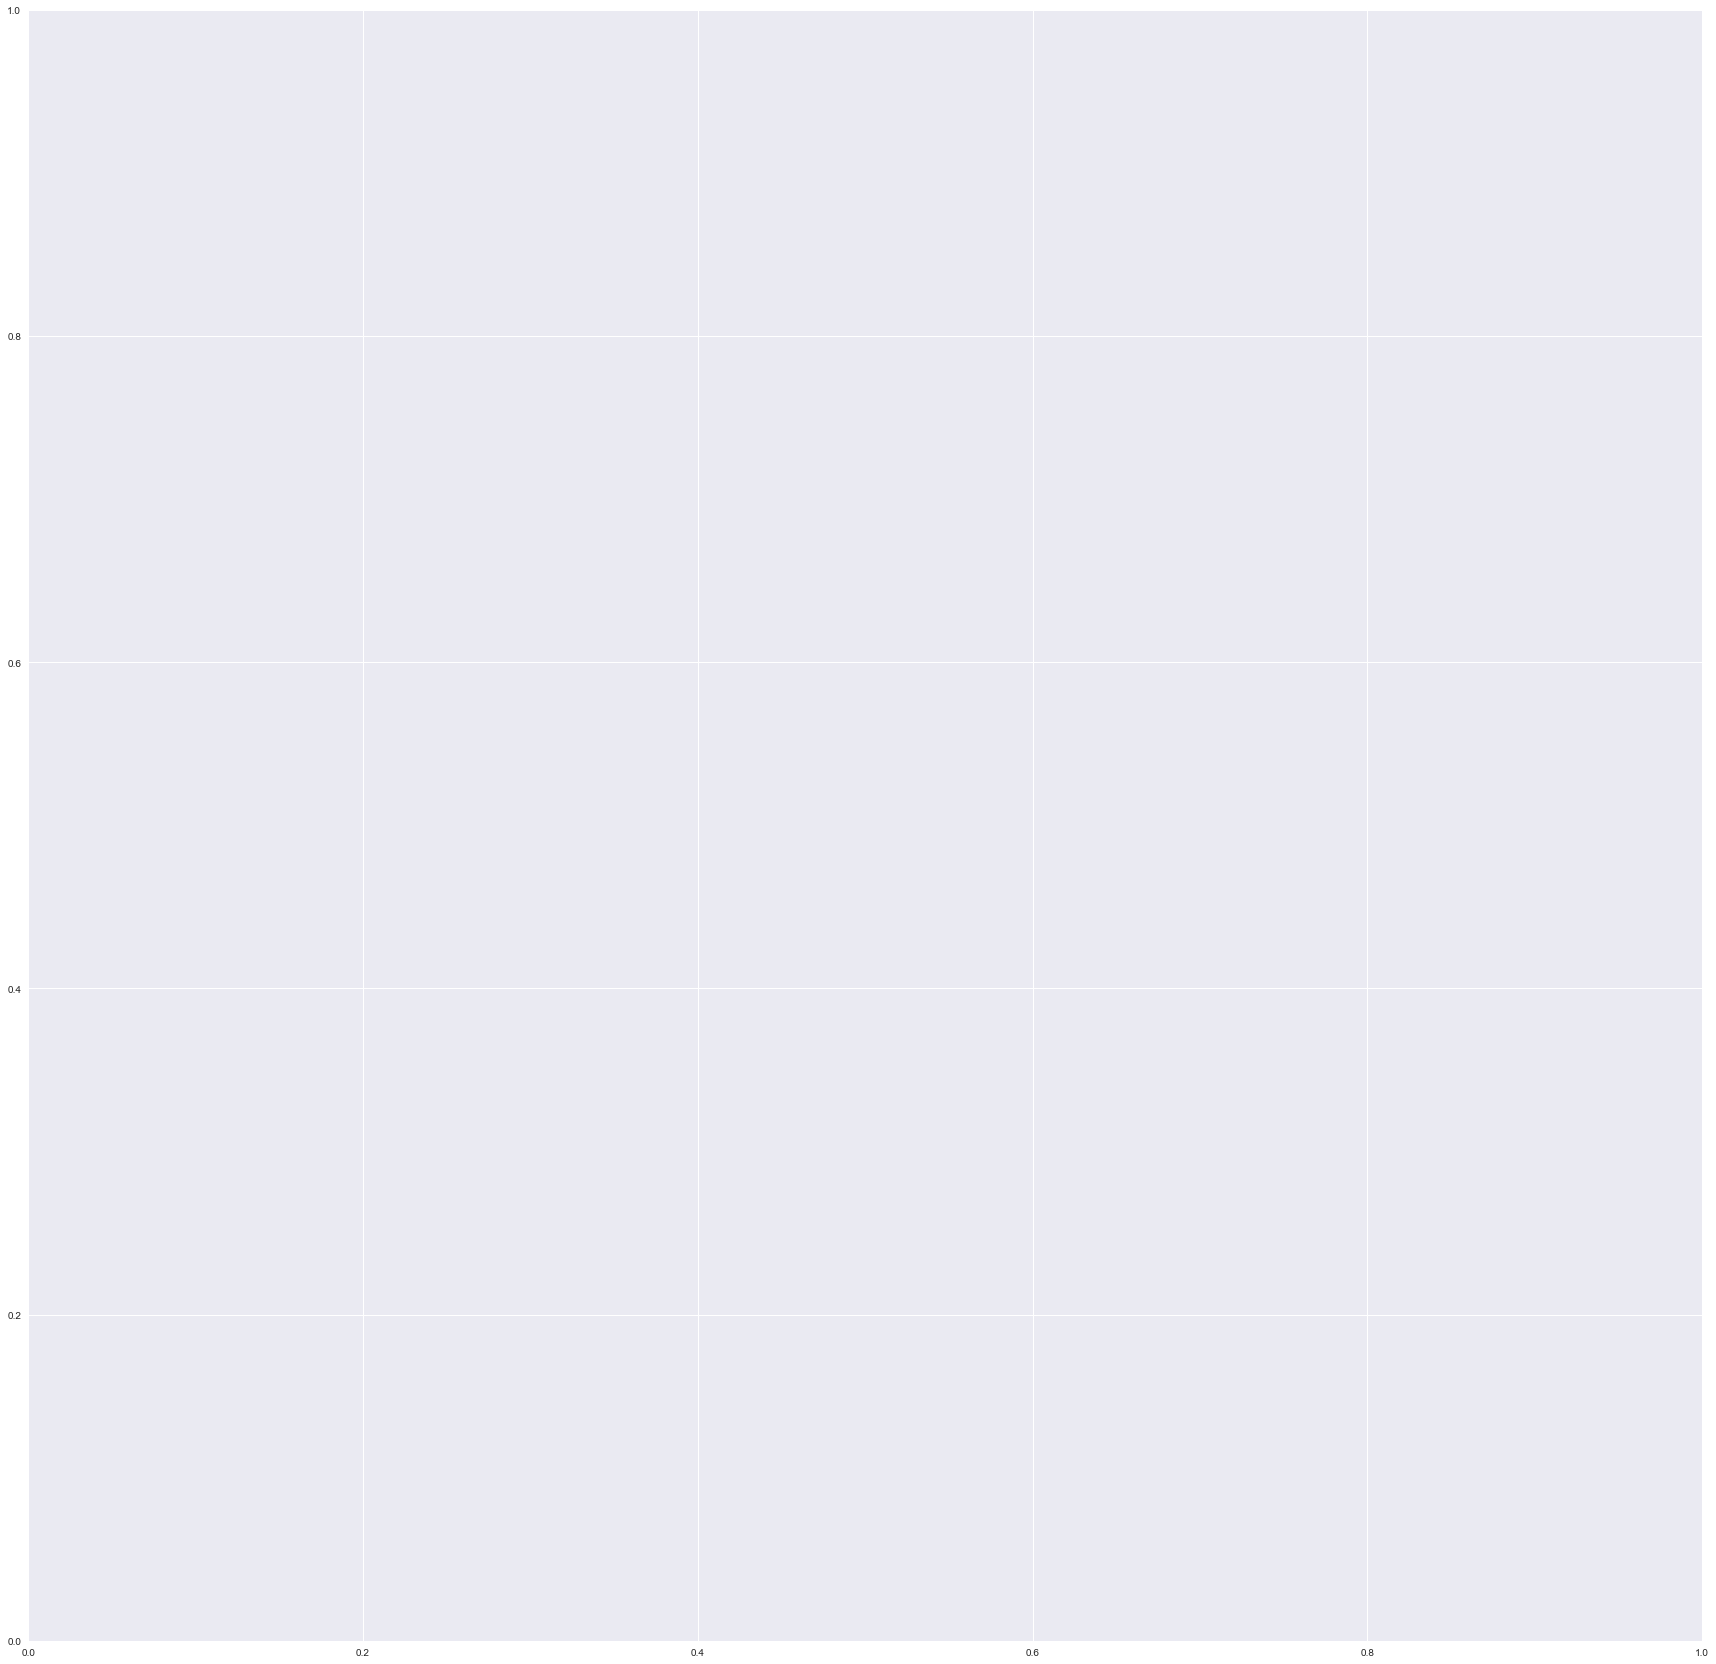

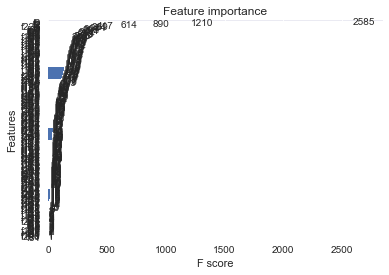

In [163]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
f, ax = pyplot.subplots(figsize=(30,30))
plot_importance(model)
plt.scatter(x=train_df['full_sq'], y=train_df['price_doc']/train_df['full_sq'], c='r')
ax.set(title='imp', xlabel='impt', ylabel='f')
#pyplot.show()

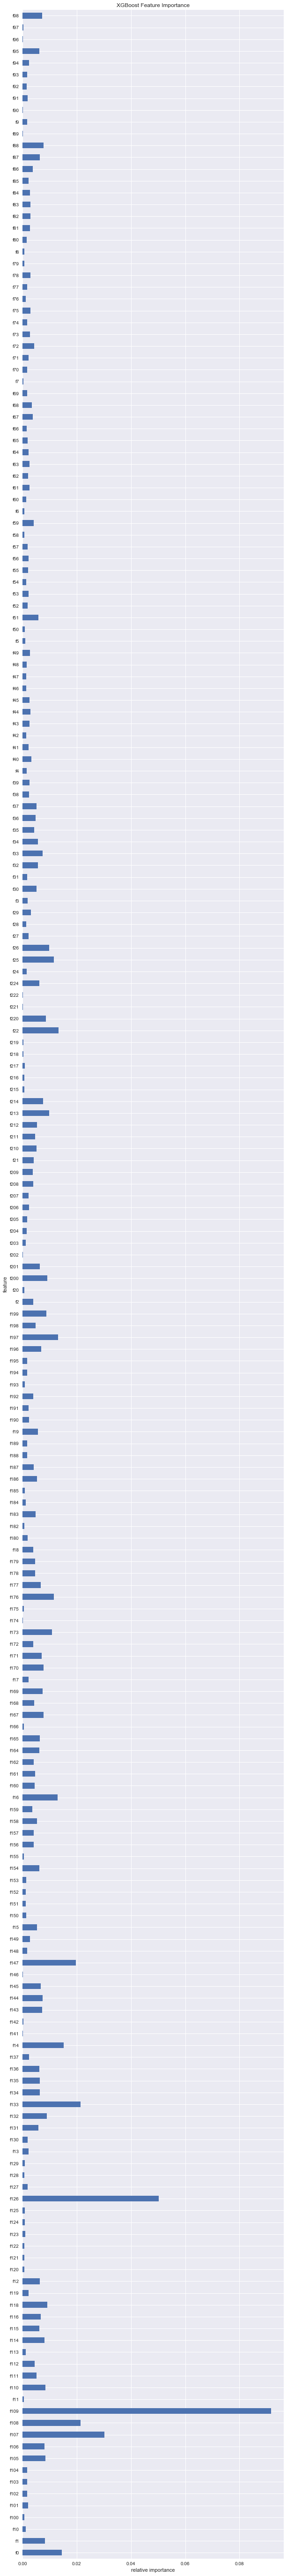

In [53]:
importance = model.get_fscore()  
importance = sorted(importance.items())  
  
df = pd.DataFrame(importance, columns=['feature', 'fscore'])  
df['fscore'] = df['fscore'] / df['fscore'].sum()  
#df.to_csv("../input/feat_sel/feat_importance.csv", index=False)  
  
plt.figure()  
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 100))  
plt.title('XGBoost Feature Importance')  
plt.xlabel('relative importance')  
plt.show()  

In [99]:
#第一次训练200次31974，变差了
#
p_add = pd.read_csv('/Users/xiechenwei/Desktop/数据挖掘结果/1034.csv')
test['add_f'] = p_add['price_doc']
xg_train = xgb.DMatrix(x_train)
p_add_train = model.predict(xg_train)
train['add_f'] = p_add_train

In [ ]:
y_pred, model = runXGB(x_train, y_train, x_test, num_rounds=250)
output = pd.DataFrame({'id': id_test, 'price_doc': y_pred})
output.to_csv('/Users/xiechenwei/Desktop/数据挖掘结果/submission1_less_feature_stacking1

In [103]:
y_pred, model = runXGB(x_train, y_train, x_test, num_rounds=200)
output = pd.DataFrame({'id': id_test, 'price_doc': y_pred})
output.to_csv('/Users/xiechenwei/Desktop/数据挖掘结果/submission1_less_feature_stacking1_1.csv', index=False)
output.head(10)

,id,price_doc
0,30474,5416845.0
1,30475,8101844.5
2,30476,5621403.5
3,30477,5842712.0
4,30478,5117101.0
5,30479,9226668.0
6,30480,4573218.0
7,30481,4370959.5
8,30482,4659921.0
9,30483,4493619.0


In [101]:
p_add['price_doc']

0        5656214.00
1        8151805.00
2        5430361.50
3        5881329.50
4        5159486.00
5        9561964.00
6        4368416.00
7        4408065.00
8        4652591.00
9        4590973.50
10       6698178.50
11       4910379.50
12       3677140.00
13       4310977.00
14       6213687.50
15       6160746.50
16      23234170.00
17      20654062.00
18       6216536.50
19      14278732.00
20       7005040.50
21      11131154.00
22       8283274.50
23       8189291.00
24       4742658.50
25       7589693.50
26      11887876.00
27       7336852.50
28       3287377.75
29       6547132.50
           ...     
7632     6733615.50
7633     3396186.00
7634    11641300.00
7635     5773126.00
7636     3741574.25
7637     5195958.50
7638     3494199.50
7639     7717022.00
7640     8196582.50
7641     3443900.25
7642     7797582.50
7643     7044735.00
7644     7814633.00
7645     3887892.50
7646     6703964.50
7647     6163046.50
7648     7002452.00
7649     5973142.50
7650     7175233.50


In [63]:
p_32092['price_doc']

0       5.057481e+06
1       8.118254e+06
2       5.109860e+06
3       5.776086e+06
4       4.839074e+06
5       8.121757e+06
6       4.135865e+06
7       4.036307e+06
8       4.881856e+06
9       4.564364e+06
10      6.157221e+06
11      4.752806e+06
12      3.673558e+06
13      3.828998e+06
14      5.924825e+06
15      5.937332e+06
16      2.121704e+07
17      1.896109e+07
18      5.883234e+06
19      1.294249e+07
20      6.723067e+06
21      1.022210e+07
22      9.607146e+06
23      8.346130e+06
24      4.389726e+06
25      7.240102e+06
26      1.125910e+07
27      6.607584e+06
28      2.845205e+06
29      5.858940e+06
            ...     
7632    6.115574e+06
7633    2.969548e+06
7634    1.129113e+07
7635    5.244721e+06
7636    3.373918e+06
7637    4.355863e+06
7638    3.234536e+06
7639    7.228501e+06
7640    1.081452e+07
7641    3.272377e+06
7642    6.815032e+06
7643    6.031643e+06
7644    7.114439e+06
7645    3.248980e+06
7646    6.217648e+06
7647    4.324170e+06
7648    7.046

In [64]:
y_b = y_pred* 0.5 + p_32092['price_doc']*0.5

In [61]:
#31743 32092 + 31915
#比预估的差一点，因为这两个相差感觉很大

#测试 32092 + 317.。
#失败，结果31809，应该是32092不够好了，或者317没有到这个结果

#增加轮数，合并测试
#31610，目前这个模型最高分6/25 参数：0.5+0.5
#尝试stacking和提高32092模型
output2 = pd.DataFrame({'id': id_test, 'price_doc': y_b})
output2.to_csv('/Users/xiechenwei/Desktop/数据挖掘结果/submission1_price_normal_32092_lessFeat.csv', index=False)
output2.head(10)

,id,price_doc
0,30474,5309573.250
1,30475,8191975.000
2,30476,5279966.250
3,30477,5920551.500
4,30478,5040952.750
5,30479,8758958.500
6,30480,4188109.125
7,30481,4209628.125
8,30482,4791099.500
9,30483,4635136.000


In [128]:
y_b2 = y_pred* 0.4 + p_32092['price_doc']*0.6

In [129]:
output3 = pd.DataFrame({'id': id_test, 'price_doc': y_b2})
output3.to_csv('/Users/xiechenwei/Desktop/数据挖掘结果/submission1_price_normal_32092_31915_modify.csv', index=False)
output3.head(10)

,id,price_doc
0,30474,5333735.850
1,30475,8342961.150
2,30476,5336484.800
3,30477,5816053.800
4,30478,5017800.700
5,30479,8669395.950
6,30480,4172195.725
7,30481,4159541.925
8,30482,4925134.550
9,30483,4751218.075


In [92]:
output.head(10)

,id,price_doc
0,30474,4836375.5
1,30475,8000542.5
2,30476,4892923.5
3,30477,5776106.0
4,30478,4847931.0
5,30479,8020197.5
6,30480,4123749.0
7,30481,3960877.0
8,30482,4591161.0
9,30483,4744559.5


In [5]:
p_add = pd.read_csv('/Users/xiechenwei/Desktop/数据挖掘结果/blend_sub_add.csv')
p_add2 = pd.read_csv('/Users/xiechenwei/Desktop/数据挖掘结果/0980X0997.csv') 
p_add.head()

,id,price_doc
0,30474,5.367705e+06
1,30475,8.317338e+06
2,30476,5.271772e+06
3,30477,5.768445e+06
4,30478,4.999065e+06


In [8]:
p_add2.head()

,id,price_doc
0,30474,5.326778e+06
1,30475,8.270905e+06
2,30476,5.301198e+06
3,30477,5.789419e+06
4,30478,4.896622e+06


In [17]:
out_df = pd.DataFrame()
out_df['id'] = p_add['id']
out_df['price_doc'] = p_add['price_doc']  * 0.396 + p_add2['price_doc'] * 0.598
out_df.to_csv('/Users/xiechenwei/Desktop/数据挖掘结果/sub_630.csv', index =False)

In [18]:
out_df['price_doc']

0       5.311024e+06
1       8.239667e+06
2       5.257738e+06
3       5.746377e+06
4       4.907809e+06
5       8.852049e+06
6       4.180708e+06
7       4.124352e+06
8       4.618447e+06
9       4.561095e+06
10      6.197559e+06
11      4.815869e+06
12      3.656886e+06
13      3.829883e+06
14      5.945049e+06
15      6.013213e+06
16      2.197612e+07
17      1.874478e+07
18      5.512780e+06
19      1.362052e+07
20      6.588356e+06
21      1.062715e+07
22      8.606238e+06
23      8.226746e+06
24      4.522714e+06
25      7.727573e+06
26      1.112283e+07
27      6.712686e+06
28      3.149608e+06
29      6.438759e+06
            ...     
7632    6.155242e+06
7633    3.261689e+06
7634    1.087338e+07
7635    5.241033e+06
7636    4.125464e+06
7637    4.694880e+06
7638    3.586374e+06
7639    7.177236e+06
7640    7.761972e+06
7641    3.634181e+06
7642    6.790378e+06
7643    5.830145e+06
7644    6.578827e+06
7645    3.552246e+06
7646    6.561322e+06
7647    4.790405e+06
7648    6.675

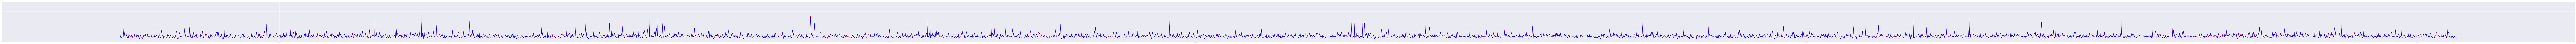

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
#df1 = pd.read_csv('0.30898.csv')
#df2 = pd.read_csv('same_result_new.csv')
#----
df2 = pd.read_csv('/Users/xiechenwei/Desktop/数据挖掘结果/blend_sub_addgl.csv')
df2['price_doc'] = df2['price_doc'] * .994
df1 = pd.read_csv('/Users/xiechenwei/Downloads/wakeuptray0980X0997.csv')
#----
f, ax = plt.subplots(figsize=(500, 8))
ts_df = df1['price_doc']
plt.plot(df1['id'], df1, color='r')
ax.set(title='id')

plt.plot(df2['id'], df2, color='b')
ax.set(title='id')

In [20]:
df1['price_doc']

0       5.326778e+06
1       8.270905e+06
2       5.301198e+06
3       5.789419e+06
4       4.896622e+06
5       8.862862e+06
6       4.171329e+06
7       4.103745e+06
8       4.648877e+06
9       4.497142e+06
10      6.203946e+06
11      4.792302e+06
12      3.680979e+06
13      3.828622e+06
14      5.926904e+06
15      6.020432e+06
16      2.194039e+07
17      1.852548e+07
18      5.435926e+06
19      1.377867e+07
20      6.535183e+06
21      1.062718e+07
22      8.784954e+06
23      8.227036e+06
24      4.529349e+06
25      7.703450e+06
26      1.111600e+07
27      6.674075e+06
28      3.191914e+06
29      6.411284e+06
            ...     
7632    6.167272e+06
7633    3.261122e+06
7634    1.095366e+07
7635    5.250798e+06
7636    4.122845e+06
7637    4.709533e+06
7638    3.607081e+06
7639    7.190429e+06
7640    7.744978e+06
7641    3.660246e+06
7642    6.824085e+06
7643    5.764408e+06
7644    6.545807e+06
7645    3.551203e+06
7646    6.568969e+06
7647    4.824624e+06
7648    6.829

In [21]:
df2['price_doc']

0       5.335499e+06
1       8.267434e+06
2       5.240141e+06
3       5.733835e+06
4       4.969070e+06
5       8.916024e+06
6       4.232666e+06
7       4.192652e+06
8       4.614617e+06
9       4.698417e+06
10      6.244126e+06
11      4.894879e+06
12      3.653856e+06
13      3.866478e+06
14      6.026151e+06
15      6.056860e+06
16      2.222886e+07
17      1.924379e+07
18      5.678091e+06
19      1.350654e+07
20      6.727865e+06
21      1.072340e+07
22      8.415957e+06
23      8.300850e+06
24      4.553733e+06
25      7.833800e+06
26      1.123387e+07
27      6.831464e+06
28      3.114643e+06
29      6.538340e+06
            ...     
7632    6.192956e+06
7633    3.292094e+06
7634    1.085139e+07
7635    5.273864e+06
7636    4.166775e+06
7637    4.715423e+06
7638    3.587787e+06
7639    7.222462e+06
7640    7.857809e+06
7641    3.627984e+06
7642    6.801308e+06
7643    5.981644e+06
7644    6.688000e+06
7645    3.585997e+06
7646    6.609292e+06
7647    4.782446e+06
7648    6.505

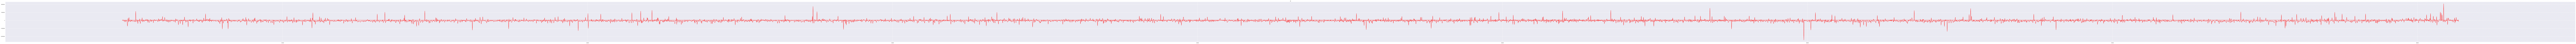

In [22]:
f, ax = plt.subplots(figsize=(500, 8))
df_sub = pd.DataFrame()
df_sub['id'] = df1['id']
df_sub['price_doc'] = df1['price_doc'] - df2['price_doc']
plt.plot(df_sub['id'], df_sub, color='r')
ax.set(title='id')

In [23]:
id_r = df1['id']
out_df = pd.DataFrame()
out_df['id'] = id_r
value = np.zeros(id_r.shape[0])
count = np.zeros(10)
for i in range(id_r.shape[0]):
    if (abs(df_sub['price_doc'][i]) <= 100000):
        value[i] = (0.52*df1['price_doc'][i] + 0.48*df2['price_doc'][i])
        count[0] += 1        
    if (abs(df_sub['price_doc'][i]) <= 400000):
        value[i] = (0.6*df1['price_doc'][i] + 0.4*df2['price_doc'][i])
        count[1] += 1
    elif (abs(df_sub['price_doc'][i]) <= 700000):
        value[i] = (0.68*df1['price_doc'][i] + 0.32*df2['price_doc'][i])
        count[2] += 1
    elif (abs(df_sub['price_doc'][i]) <= 1000000):
        value[i] = (0.76*df1['price_doc'][i] + 0.24*df2['price_doc'][i])
        count[3] += 1
    elif (abs(df_sub['price_doc'][i]) <= 1300000):
        value[i] = (0.84*df1['price_doc'][i] + 0.16*df2['price_doc'][i])
        count[4] += 1
    elif (abs(df_sub['price_doc'][i]) <= 1600000):
        value[i] = (0.92*df1['price_doc'][i] + 0.08*df2['price_doc'][i])
        count[5] += 1
    elif (abs(df_sub['price_doc'][i]) <= 1900000):
        value[i] = (0.98*df1['price_doc'][i] + 0.02*df2['price_doc'][i])
        count[6] += 1
    else:
        value[i] = df1['price_doc'][i]# + df2['price_doc'][i])
        count[7] += 1
out_df['price_doc'] = value
out_df.to_csv('/Users/xiechenwei/Desktop/数据挖掘结果/alala_try.csv', index=False)
print (out_df.price_doc.mean())
print (count)

7254711.248261035
[  5.08800000e+03   7.44600000e+03   1.47000000e+02   3.70000000e+01
   2.60000000e+01   3.00000000e+00   1.00000000e+00   2.00000000e+00
   0.00000000e+00   0.00000000e+00]
